<a href="https://colab.research.google.com/github/NathWolf/NATCOR_heuropt/blob/main/NATCOR_Challenge_2_Heuristics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Provided code

You are provided with implementations of the `Instance` and `Solution` classes.  An object of the `Instance` class stores all the problem instance data, i.e. the coordinates of the nodes in the graph.  Based on these coordinates, it can also calculate the distance between any two nodes.  An object of the `Solution` class stores a reference to the instance and the sequence of nodes in a tour.  It can calculate the length of the tour, verify that the tour is feasible (useful for debugging) and clone the solution (convenient in iterative improvement procedures to go back to the previous solution).

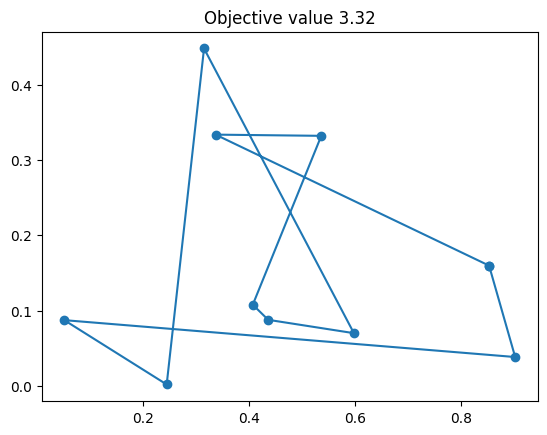

4 -> 2 -> 0 -> 6 -> 9 -> 8 -> 7 -> 1 -> 3 -> 5; objective 3.3154278452872092


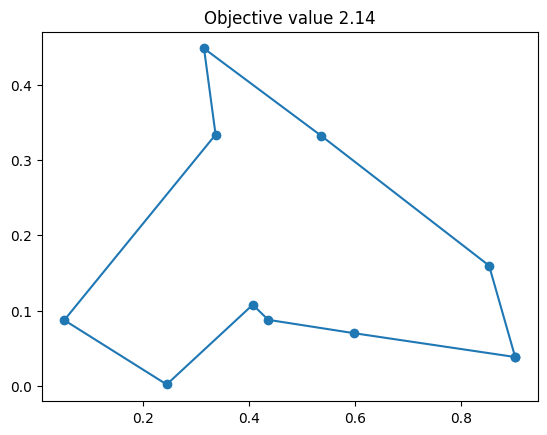

2 -> 8 -> 7 -> 1 -> 6 -> 0 -> 5 -> 9 -> 3 -> 4; objective 2.1412083150866836


In [ ]:
import itertools
import random
import sys

import numpy as np
import matplotlib.pyplot as plt


class Instance:
    def __init__(self, n):
        self.coordinates = [(random.random(), random.random()) for i in range(n)]

    def distance(self, v, u):
        return np.linalg.norm([self.coordinates[v][i] - self.coordinates[u][i] for i in range(2)])

    def get_n(self):
        return len(self.coordinates)

    def get_coordinates(self, v):
        return self.coordinates[v]


class Solution:
    def __init__(self, instance, sequence):
        self.instance = instance
        self.sequence = sequence

    def calculate_objective(self):
        prev = self.sequence[-1]
        result = 0
        for v in self.sequence:
            result += self.instance.distance(prev, v)
            prev = v

        return result

    def clone(self):
        return Solution(self.instance, list(self.sequence))

    def check_feasibility(self):
        if len(self.sequence) == self.instance.get_n() and \
                set(self.sequence) != set(range(self.instance.get_n())):
            raise Exception('The solution is not feasible.')

    def __str__(self):
        return ' -> '.join(str(node) for node in self.sequence) + \
            f'; objective {self.calculate_objective()}'


def random_initialisation(instance):
    sequence = list(range(instance.get_n()))
    random.shuffle(sequence)
    return Solution(instance, sequence)


def insert_iterative_improvement(solution):
    objective = solution.calculate_objective()
    for i, j in itertools.permutations(range(solution.instance.get_n()), 2):
        old_sequence = list(solution.sequence)
        node = solution.sequence[i]
        del solution.sequence[i]
        solution.sequence.insert(j, node)

        new_objective = solution.calculate_objective()
        if new_objective < objective:
            return True

        solution.sequence = old_sequence

    return False


def plot_solution(solution):
    solution.check_feasibility()
    plt.plot(*zip(*[solution.instance.get_coordinates(v)
        for v in solution.sequence + solution.sequence[0:1]]), marker='o')
    plt.title(f'Objective value {solution.calculate_objective():.2f}')
    plt.show()


# Create benchmark instances; feel free to create more instances:
random.seed(123)
benchmark_instances = [Instance(10), Instance(20), Instance(50),
                       Instance(100), Instance(200)]

# Example code to run a construction heuristic and then improve the obtained
# solution with a local search:
solution = random_initialisation(benchmark_instances[0])
plot_solution(solution)
print(solution)

# Keep applying Insert Iterative Improvement until finiding a local minimum:
while insert_iterative_improvement(solution):
    pass

plot_solution(solution)
print(solution)


# Your answer